<a href="https://colab.research.google.com/github/kwanization/Machine_Learning_Study/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#유방암 데이터

plt.style.use(['seaborn-whitegrid'])

> 이거 안됨



In [78]:
import pandas as pd
import numpy as np
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')

In [79]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [80]:
cancer = load_breast_cancer()

## target > 0 = 악성(Malignant), 1 = 양성(Benign)

In [81]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 모델을 학습시키기 위해 데이터를 분할해보자

### x는 독립변수, y는 종속변수 0은 악성, 1은 양성
### 모델 학습하는데 80%쓰고, 평가하는데 20 씀

In [82]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 훈련 데이터를 데이터프레임으로 다시 이쁘게

In [83]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.400,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,...,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464,1
1,12.720,17.67,80.98,501.3,0.07896,0.04522,0.01402,0.01835,0.1459,0.05544,...,20.96,88.87,586.8,0.10680,0.09605,0.03469,0.03612,0.2165,0.06025,1
2,12.990,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,16.91,87.38,576.0,0.11420,0.19750,0.14500,0.05850,0.2432,0.10090,1
3,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,1
4,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,...,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,0
451,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,27.98,88.52,552.3,0.13490,0.18540,0.13660,0.10100,0.2478,0.07757,1
452,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,18.04,69.47,328.1,0.20060,0.36630,0.29130,0.10750,0.2848,0.13640,1
453,10.250,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702,1


### 이번엔 테스트 데이터를 데이터프레임으로 이쁘게

In [84]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732,1
1,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.14590,0.09975,0.2948,0.08452,0
2,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.019680,0.1800,0.06569,...,15.65,73.23,394.5,0.1343,0.1650,0.08615,0.06696,0.2937,0.07722,1
3,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.023810,0.1930,0.06621,...,17.70,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431,1
4,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,...,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.091130,0.1929,0.06744,...,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190,0
110,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,1
111,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.017780,0.1584,0.07065,...,21.47,71.68,367.0,0.1467,0.1765,0.13000,0.05334,0.2533,0.08468,1
112,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.024160,0.1387,0.06891,...,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209,1


### 데이터 전처리를 해보자, (스케일링)

### 평균이 0, 표준편차가 1이 되도록 >> 요것이 Z-score 정규화

### 왜하냐? 머신러닝은 특성 간의 스케일에 영향을 받기 때문에, 지난번 정효샘이 설명ㅎㅎ

In [85]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### 전처리를 했으니, KNN로 모델을 훈련시키자~

In [86]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9494505494505494
평가 데이터 점수: 0.9298245614035088


In [12]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

### KNN은 거리 기반 알고리즘이므로 스케일 조정을 해야 함

In [13]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9714285714285714
평가 데이터 점수: 0.956140350877193


### 파이프라인 구문을 통해 전처리와 모델을 한방에 해치워 보자

### 전처리 단계와 모델이 하나로 묶이기 때문에 실수 발생 가능성이 줄어든다~

### 테스트데이터에도 자동으로 스케일링이 되기 때문에 데이터 누수 방지도 됨

In [14]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

### 교차 검증해서 맞는지 봐야겠지?

### 파이프라인으로 스케일링이랑 모델 적용

### 전체 데이터

### 5겹 교차

### 가능한 CPU 쥐어짜

### 실행과정 출력해


In [15]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    4.0s finished


{'fit_time': array([0.00464749, 0.00491738, 0.00352621, 0.00328898, 0.00327921]),
 'score_time': array([0.03283978, 0.0320456 , 0.00392795, 0.00361633, 0.0031395 ]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [16]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [17]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [18]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


In [88]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [20]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [21]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


### 고차원의 데이터를 2차원으로 시각화 해보자

### 2차원으로 축소

### 고차원 데이터를 2D로 변환

In [22]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

### 축소된 데이터도 데이터프레임으로 이쁘게 해야겠지?

In [23]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,42.337463,-12.640097,0
1,42.500240,-9.928030,0
2,37.894382,-10.039126,0
3,-17.654438,1.451124,0
4,36.764866,-7.930646,0
...,...,...,...
564,44.029003,-9.311248,0
565,38.830563,-9.435006,0
566,22.498896,-2.705058,0
567,40.378845,-10.038561,0


### 2차원 데이터를 플롯으로 시각화 해봄

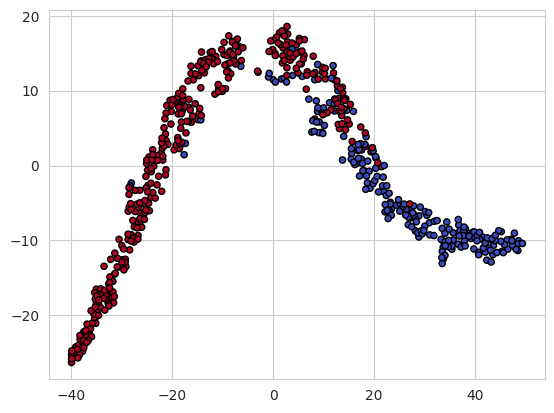

In [24]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 축소된 데이터로 KNN모델 학습

In [25]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)


In [90]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

IndexError: index 1 is out of bounds for axis 1 with size 1

# 와인 데이터

In [28]:
wine = load_wine()

In [29]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [30]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2
1,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
2,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
3,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,2
4,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
138,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0
139,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
140,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0


In [32]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0,0
1,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
2,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
3,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
4,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406.0,1
5,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
6,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1
7,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0,2
8,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
9,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,0


In [33]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7605633802816901
평가 데이터 점수: 0.75


In [36]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [37]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9788732394366197
평가 데이터 점수: 1.0


In [38]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)


In [39]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00333738, 0.00350022, 0.00731277, 0.00552559, 0.00262237]),
 'score_time': array([0.00773597, 0.0082562 , 0.00702643, 0.00935197, 0.0047853 ]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [40]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)


In [41]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [42]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [43]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [44]:
gs.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [45]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [46]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [47]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,11.885133,-0.480538,0
1,11.506394,-1.147849,0
2,14.050035,-1.015527,0
3,16.863930,-1.384284,0
4,3.268320,-0.451542,0
...,...,...,...
173,3.289910,-0.019914,2
174,3.707676,-0.103938,2
175,6.272249,-0.490825,2
176,6.423851,-0.620846,2


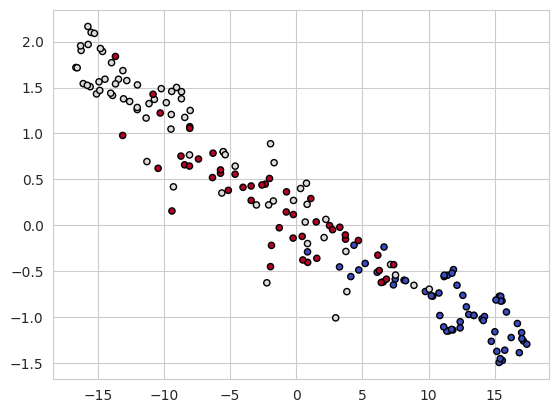

In [48]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [49]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)


In [50]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

NameError: name 'make_meshgrid' is not defined

#캘리포니아 주택 가격 데이터

In [51]:
california = fetch_california_housing()

In [52]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.6471,19.0,6.479339,0.962810,1631.0,3.369835,37.32,-120.45,1.01400
1,2.6719,35.0,4.455026,1.063492,763.0,4.037037,33.88,-118.23,1.09800
2,2.8942,26.0,4.718182,1.039394,1948.0,2.951515,32.73,-117.09,1.24100
3,3.0871,42.0,4.381988,0.975155,1432.0,4.447205,33.92,-118.20,1.38800
4,6.3501,23.0,6.299479,0.906250,1066.0,2.776042,37.66,-122.04,3.50000
...,...,...,...,...,...,...,...,...,...
16507,3.5313,39.0,5.660194,1.077670,640.0,3.106796,33.90,-118.36,2.30400
16508,2.8864,23.0,5.607029,1.025559,1061.0,3.389776,38.69,-121.79,1.03100
16509,2.0405,44.0,3.628037,1.082243,2049.0,3.829907,34.04,-118.29,1.43000
16510,2.6354,27.0,3.493377,1.149007,718.0,2.377483,37.79,-122.27,1.87500


In [55]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.3370,35.0,5.320537,1.030710,1392.0,2.671785,32.82,-117.20,1.72300
1,4.5938,39.0,6.205882,0.941176,635.0,2.334559,32.73,-117.25,3.67400
2,2.0968,23.0,2.853881,1.080670,2555.0,3.888889,34.19,-118.39,1.62500
3,5.4399,4.0,7.388889,1.086700,4010.0,3.375421,38.29,-121.98,1.87100
4,1.7500,50.0,3.926901,0.941520,1063.0,3.108187,36.76,-119.78,0.49800
...,...,...,...,...,...,...,...,...,...
4123,7.4897,43.0,6.255760,1.055300,1151.0,2.652074,33.97,-118.38,3.62600
4124,6.0224,38.0,5.100000,1.200000,41.0,4.100000,33.80,-117.89,1.87500
4125,4.4500,46.0,5.320359,1.083832,896.0,2.682635,34.00,-118.45,3.48300
4126,2.9511,17.0,3.586934,1.065332,1694.0,1.785037,34.14,-118.14,2.82300


In [56]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [57]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [58]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.44820388876382533
평가 데이터 점수: 0.1802831741640134


In [59]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [60]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7957095017000846
평가 데이터 점수: 0.6672529067832167


In [61]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)


In [62]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.2s finished


{'fit_time': array([0.10229492, 0.06411576, 0.04261398, 0.04549956, 0.04016566]),
 'score_time': array([0.87803841, 0.86921811, 0.63687015, 0.79680586, 0.47315812]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [63]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [64]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [65]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [66]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [67]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [68]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379834


In [91]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [92]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df


,0,target
0,43.540730,0
1,43.595871,0
2,40.278904,0
3,-21.389765,0
4,39.472610,0
...,...,...
564,44.902367,0
565,40.841774,0
566,26.277147,0
567,41.925262,0


<ipython-input-93-2e14203f0af2>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


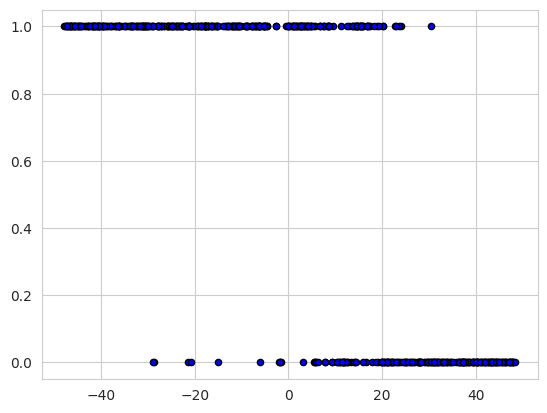

In [93]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [94]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)


<ipython-input-95-22c7a1c6cf03>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
<ipython-input-95-22c7a1c6cf03>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


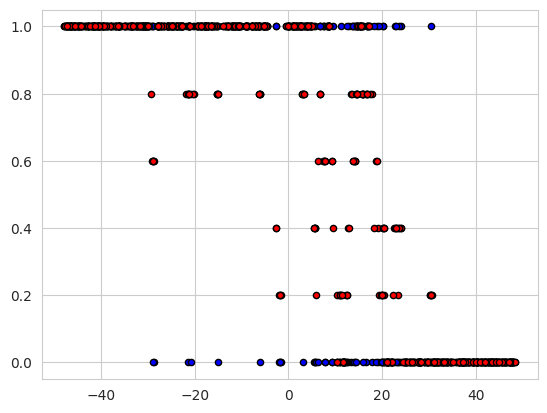

In [95]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');